

假设我们有一个 RNN Cell，其在时间步 t 的输入为 \(x_t\)，隐藏状态为 \(h_t\)。RNN Cell 的计算包括输入到隐藏状态的转换和隐藏状态到输出的转换。

在时间步 t，RNN Cell 的隐藏状态 \(h_t\) 的计算可以用以下方程表示：

\[
h_t = \text{tanh}(W_{ih} \cdot x_t + b_{ih} + W_{hh} \cdot h_{t-1} + b_{hh})
\]

其中：
- \(x_t\) 是时间步 t 的输入向量。
- \(h_{t-1}\) 是时间步 t-1 的隐藏状态。
- \(W_{ih}\) 和 \(W_{hh}\) 是输入到隐藏状态的权重矩阵。
- \(b_{ih}\) 和 \(b_{hh}\) 是偏置向量。

RNN Cell 的输出 \(y_t\) 由隐藏状态 \(h_t\) 计算得出：

\[
y_t = \text{softmax}(W_{hy} \cdot h_t + b_{hy})
\]

其中：
- \(W_{hy}\) 是隐藏状态到输出的权重矩阵。
- \(b_{hy}\) 是输出的偏置向量。
- \(\text{softmax}\) 是用于将输出转换为概率分布的函数。

整个 RNN 网络可以由多个 RNN Cell 连接而成，每个 RNN Cell 的隐藏状态作为下一个时间步的输入。

如果我们考虑整个序列的长度为 T，则RNN 网络的正向传播可以用以下公式表示：

\[
\begin{align*}
h_t &= \text{tanh}(W_{ih} \cdot x_t + b_{ih} + W_{hh} \cdot h_{t-1} + b_{hh}) \\
y_t &= \text{softmax}(W_{hy} \cdot h_t + b_{hy}) \\
\end{align*}
\]

重复上述步骤直至时间步 T，得到整个序列的输出。

这些方程描述了使用 RNN Cell 的 RNN 网络的正向传播过程，其中隐藏状态在时间步之间传递信息，并生成每个时间步的输出。

describe in a short sentence how the network is trained.
训练过程中对每个数据获取下一个字母进行比较

这种训练模型的合理性在于其能够适应序列数据，并通过时间步来处理序列中的信息。RNN模型通过在每个时间步对输入数据执行相同的操作，利用先前时间步的信息来预测下一个时间步的输出。这种递归结构使得RNN适合于处理序列数据，例如文本、语音或时间序列。

在训练过程中，损失函数的比较对象是模型的预测输出与真实标签之间的差异。对于字符级别的RNN生成模型，常见的损失函数可以是交叉熵损失函数，它在多分类任务中常被使用。损失函数通过量化模型输出与真实标签之间的差异，将模型的预测与实际期望结果进行比较。

具体来说，在字符级别RNN生成模型中，训练时每个时间步的损失函数比较了模型预测的字符分布与实际下一个字符的概率分布。通过最小化这些损失函数，模型会学习到生成下一个最可能的字符的策略。

这种比较有助于模型在训练过程中不断调整权重，以最小化预测与真实标签之间的差异，使得模型能够更好地生成符合预期的文本序列。


In [4]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('./data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
print(f"n_categories={n_categories}")
print(f"all_categories={all_categories}")
print(f"category_lines={category_lines}")
print(f"all_letters={all_letters}") #26*2+5=52+5=57


['data/names\\Arabic.txt', 'data/names\\Chinese.txt', 'data/names\\Czech.txt', 'data/names\\Dutch.txt', 'data/names\\English.txt', 'data/names\\French.txt', 'data/names\\German.txt', 'data/names\\Greek.txt', 'data/names\\Irish.txt', 'data/names\\Italian.txt', 'data/names\\Japanese.txt', 'data/names\\Korean.txt', 'data/names\\Polish.txt', 'data/names\\Portuguese.txt', 'data/names\\Russian.txt', 'data/names\\Scottish.txt', 'data/names\\Spanish.txt', 'data/names\\Vietnamese.txt']
Slusarski
n_categories=18
all_categories=['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']
category_lines={'Arabic': ['Khoury', 'Nahas', 'Daher', 'Gerges', 'Nazari', 'Maalouf', 'Gerges', 'Naifeh', 'Guirguis', 'Baba', 'Sabbagh', 'Attia', 'Tahan', 'Haddad', 'Aswad', 'Najjar', 'Dagher', 'Maloof', 'Isa', 'Asghar', 'Nader', 'Gaber', 'Abboud', 'Maalouf', 'Zogby', 'Srour', 'Baha

In [5]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print("J:",letterToTensor('J'))
print("j:",letterToTensor('j'))

print(lineToTensor('Jones').size())#5*1*57
print("Jones:",lineToTensor('Jones'))

J: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
j: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])
Jones: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

In [6]:
import random

# Random item from a list
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Get a random category and random line from that category
def randomTrainingPair():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    return category, line
# One-hot vector for category
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

# One-hot matrix of first to last letters (not including EOS) for input
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

# ``LongTensor`` of second letter to end (EOS) for target
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indexes)
# Make category, input, and target tensors from a random category, line pair
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor
print(f"randomTrainingExample={randomTrainingExample()}")

In [7]:
TOTAL=0
for ntype in all_categories:
    NameList=category_lines[ntype]
    TOTAL+=len(NameList)
print(f"total data={TOTAL}")

total data=20074


In [10]:
import torch
import torch.nn as nn

class CharRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CharRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn_cell = nn.RNNCell(input_size, hidden_size)
        self.i2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category,input, hidden):
        input_combined = torch.cat((category, input), 1)
        hidden = self.rnn_cell(input_combined, hidden)
        output = self.i2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

# 示例用法：
input_size =n_letters+n_categories # 输入字符的大小
hidden_size =128 # 隐藏层大小
output_size =n_letters # 输出字符的大小

# 初始化模型
char_rnn = CharRNN(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.NLLLoss()  # 使用负对数似然损失作为损失函数
optimizer = torch.optim.Adam(char_rnn.parameters(), lr=0.001)

# 迭代训练模型
epochs = 5
trainingN=int(TOTAL*0.8)
testN=int(TOTAL*0.2)
train_loss=[]
for epoch in range(epochs):
    running_loss = 0.0
    for i in range(trainingN):
        category_tensor, input_line_tensor, target_line_tensor=randomTrainingExample()
        target_line_tensor.unsqueeze_(-1)
        hidden = char_rnn.initHidden()
        optimizer.zero_grad()  # 梯度归零
        loss = torch.Tensor([0]) # you can also just simply use ``loss = 0``
        for i in range(input_line_tensor.size(0)):
            output, hidden = char_rnn(category_tensor, input_line_tensor[i], hidden)
            l = criterion(output, target_line_tensor[i])
            loss += l
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重
    running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/TOTAL}")
    train_loss.append(running_loss/TOTAL)
print('Training finished!')
# Save the trained model
torch.save(char_rnn.state_dict(), 'rnn_model_10_2.pth')

Epoch 1/5, Loss: 0.0007527386915331
Epoch 2/5, Loss: 0.0005844325625921395
Epoch 3/5, Loss: 0.0005750459445072761
Epoch 4/5, Loss: 0.0008572779578778733
Epoch 5/5, Loss: 0.00020670570129534393
Training finished!


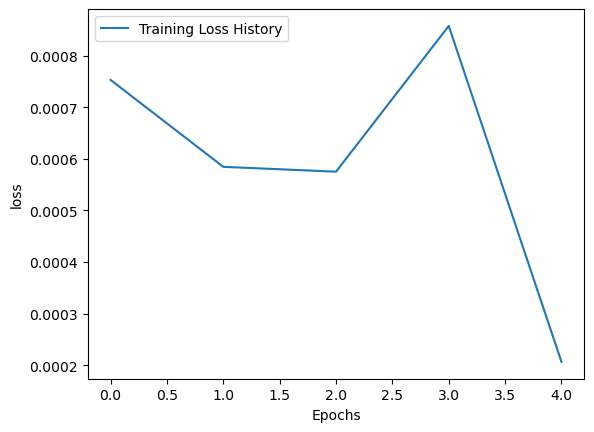

In [11]:
import matplotlib.pyplot as plt
def plotLossHistory(train_losses):
    plt.figure()
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss History')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
plotLossHistory(train_loss)

In [20]:
max_length = 20
char_rnn.load_state_dict(torch.load('rnn_model_10_2.pth'))
char_rnn.eval()
# Sample from a category and starting letter
def sample(category, start_letter='A'):
    with torch.no_grad():  # no need to track history in sampling
        category_tensor = categoryTensor(category)
        input = inputTensor(start_letter)
        hidden = char_rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            output, hidden = char_rnn(category_tensor, input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = inputTensor(letter)

        return output_name

# Get multiple samples from one category and multiple starting letters
def samples(category, start_letters='ABC'):
    for start_letter in start_letters:
        print(f"{category}:{sample(category, start_letter)}")

samples('Russian', 'RUS')

samples('German', 'GER')

samples('Spanish', 'SPA')

samples('Chinese', 'CHI')

Russian:Ruhkov
Russian:Ughanov
Russian:Shakhov
German:Groser
German:Esser
German:Rosenberg
Spanish:Santana
Spanish:Patera
Spanish:Aberquero
Chinese:Chang
Chinese:Han
Chinese:Isong


评估训练后模型的性能通常涉及多个指标和方法。对于字符级别的 RNN 生成模型，以下是一些可能的评估指标和方法：

### 1. Perplexity (困惑度)
- **定义：** 用于评估模型在语言建模任务中的性能。困惑度衡量模型对给定序列的预测能力，值越低表示模型越好。
- **评估方法：** 对于测试数据集中的每个序列，使用模型计算每个字符的概率分布，并计算整个序列的平均困惑度。

### 2. Generation Accuracy (生成准确率)
- **定义：** 评估模型生成的文本序列与真实文本序列之间的相似性。
- **评估方法：** 生成模型基于给定输入生成一些文本序列，然后使用人工评估或基于一些标准（如编辑距离）来计算生成文本与真实文本之间的相似性。

### 3. Diversity of Generated Texts (生成文本的多样性)
- **定义：** 衡量模型生成文本序列的多样性。
- **评估方法：** 通过检查模型生成的多个样本，观察其差异性和多样性。重复性高的文本序列可能表明模型缺乏多样性。

### 4. Human Evaluation (人工评估)
- **定义：** 由人工评估者对生成的文本进行主观评估。
- **评估方法：** 邀请人工评估者阅读模型生成的文本，并评估其质量、流畅性和语义合理性等方面。

### 测试数据的选择：
- **数据来源：** 选择具有多样性和代表性的测试数据，包括从与训练数据来源相似的语料库中抽取的数据。
- **数据类型：** 包含各种长度、语言风格和主题的文本序列。
- **数据预处理：** 对测试数据进行与训练数据相似的预处理，例如分词、编码等。

### 评估方法总结：
1. **定量评估：** 使用困惑度等指标对模型进行定量评估。
2. **质量评估：** 通过人工评估或与实际数据对比以评估生成文本的质量。
3. **多样性评估：** 检查生成文本的多样性，确保模型生成的文本不是过于相似或重复的。

综合使用以上方法可以更全面地评估模型的性能，包括其生成的文本质量、多样性以及在语言建模任务中的表现。

增加网络规模（更多隐藏单元或更多层）可能有助于提高模型的表示能力，并且在某些情况下可能改善性能。然而，这种改善是否会带来更好的结果取决于多个因素，包括数据集的大小、复杂性以及任务的特性。

### 大型网络的潜在好处：
- **更强的表示能力：** 更大的网络可能能够更好地捕捉数据中的复杂模式和特征。
- **更好的性能：** 对于复杂的任务或大型数据集，增加网络规模有可能提高模型性能。

### LSTM 替代基本 RNN 的影响：
LSTM（长短期记忆网络）相对于基本的循环神经网络（RNN）具有更强的记忆能力和长期依赖性建模能力。它通过门控机制来有效地捕捉和处理序列中的长距离依赖关系，相比之下，标准的 RNN 存在梯度消失或爆炸等问题。

### LSTM 相对于基本 RNN 的优势：
- **长期记忆能力：** LSTM可以更好地处理序列中的长期依赖，有助于捕获长距离的相关性。
- **减少梯度消失问题：** LSTM通过门控单元可以减少梯度消失问题，使其更适合处理长序列。

### 在实践中的应用：
- **数据规模：** 对于小型数据集，使用更大的网络可能会导致过拟合，并且可能不会带来明显的性能提升。
- **任务复杂度：** 对于复杂的任务，如机器翻译或生成长文本，LSTM相对于基本RNN可能会提供更好的性能。

总体来说，在选择网络大小以及选择 LSTM 还是基本 RNN 时，需要根据特定任务、数据集的规模和性质，以及计算资源的限制来进行权衡和实验。在某些情况下，大型网络或者使用 LSTM 可能会带来更好的结果，但并非对所有情况都适用。因此，针对特定任务进行实验和评估是非常重要的。